<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jorgefdzlara/blob/main/MNA_IAyAA_semana_6_Actividad_JFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


import matplotlib.pyplot as plt

**Objetivo:** Predecir si una persona es clasificada como confiable a la asignación de un crédito, o no lo es tomando la base de datos históricos del South_German_Credit_Data_Set.



#**Ejercicio-1.** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como
se indica en la página de la UCI.

**NOTA:** Si lo deseas, puedes traducirlos y ponerlas en español.

Para un manejo de los datos de forma directa, se descargó la base de datos y fue incluida en un repositorio público en "GitHub", de tal forma que cualquiera pueda acceder a él, sin necesidasd de incorporar el archivo al directorio.
 

In [2]:
filename='https://raw.githubusercontent.com/JoelOrlandoHR/RANDOM/main/SouthGermanCredit.asc'

Para obtener una primera percepción, creamos el dataframe y visualizamos una las primeras 5 filas.

In [7]:
from pandas.io.parsers.readers import read_csv
df = pd.read_csv(filename, sep=' ')
df_esp = df
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


Derivado que los nombres de las columnas están en Alemán, para una mejor comprensión, los traduciremos a inglés y español utilizando la descripción del conjunto de datos que se encuentra en el link:

 https://archive.ics.uci.edu/ml/datasets/South+German+Credit#


In [19]:
renamed_cols = ["status", "duration", "credit_history", "purpose", "amount", "savings", 
                   "employment_duration", "installment_rate", "personal_status_sex", 
                   "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing",
                   "number_credits", "job", "people_liable", "telephone", "foreign_worker", "credit_risk"]
                  
renamed_cols_esp = ["Estado", "Duracion", "Historial_crediticio", "Proposito", "Importe", "Ahorros", "Duracion_Empleo",
                    "tasa", "Genero", "Otros_Acreedores", "Residencia_Actual", "Bienes", "Edad", "Otros_planes_de_credito",
                    "Tipo_de_vivienda", "Numero_de_creditos", "trabajo", "Dependientes", "Telefono", "Trabajador_extranjero", "Riesgo_de_credito"]

df.columns = renamed_cols_esp

df.columns #Mostramos los nombres de las columnas para verificar que se haya realizado el cambio de nombre de forma correcta

Index(['Estado', 'Duracion', 'Historial_crediticio', 'Proposito', 'Importe',
       'Ahorros', 'Duracion_Empleo', 'tasa', 'Genero', 'Otros_Acreedores',
       'Residencia_Actual', 'Bienes', 'Edad', 'Otros_planes_de_credito',
       'Tipo_de_vivienda', 'Numero_de_creditos', 'trabajo', 'Dependientes',
       'Telefono', 'Trabajador_extranjero', 'Riesgo_de_credito'],
      dtype='object')

Para poder tener un primer acercamiento con la variable resultado, generamos el reporte estadístico sobre el Riesgo de crédito.

In [16]:
df['Riesgo_de_credito'].describe()

count    1000.000000
mean        0.700000
std         0.458487
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Riesgo_de_credito, dtype: float64

#**Ejercicio-2.**

Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de
15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es
necesario en este paso generar el conjunto de validación. Define como la variable X a todas las
variables de entrada y a la variable Y como la variable de salida.

Generamos el modelo conforme a lo específicado en las instrucciones, eliminando la variable resultado.

In [20]:
X = df.copy().drop(columns='Riesgo_de_credito')
y = df.copy()['Riesgo_de_credito']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=5)

#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas
para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de
cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal
(discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha
información realiza un Pipeline que incluya al menos las siguientes transformaciones:
1. Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable
(decide y justifica que tipo de imputación realizas en cada caso).
2. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una
transformación que escale a todas ellas en un rango equiparable.
3. Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y
binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la
transformación one-hot encoding. Por el momento dejar las variables ordinales sin
transformar.

##ANALIZANDO LOS DATOS ORIGINALES

Antes de resolver el ejercicio 3 es necesario entender los datos. Por esto, primero vamos a analizar el conjunto de datos que se nos ha proporcionado. Tomando en cuenta los tipos de datos, valores nulos y su distribución.


Veriicamos si existen valores nulos.



In [21]:
df.isna().any()

Estado                     False
Duracion                   False
Historial_crediticio       False
Proposito                  False
Importe                    False
Ahorros                    False
Duracion_Empleo            False
tasa                       False
Genero                     False
Otros_Acreedores           False
Residencia_Actual          False
Bienes                     False
Edad                       False
Otros_planes_de_credito    False
Tipo_de_vivienda           False
Numero_de_creditos         False
trabajo                    False
Dependientes               False
Telefono                   False
Trabajador_extranjero      False
Riesgo_de_credito          False
dtype: bool

Una vez que se conoce que no se tienen valores nulos, procederemos a dividir nuestras variables o características de acuerdo al tipo de dato.

De acuerdo a nustra documentación, nuestra entrada o variable "X" se encuentra dividida de la siguiente forma:

* **Variables Categóricas:** 
> 1. 'status'/'Estado'
> 2. 'credit_history'/'Historial_crediticio'
> 3. 'purpose'/'Proposito'
> 4. 'savings'/'Ahorros'
> 5. 'personal_status_sex'/'Genero'
> 6. 'other_debtors'/'Otros_acreedores'
> 7. 'other_installment_plans'/'Otros_planes_de_credito'
> 8. 'housing'/'Tipo_de_vivienda'



* **Variables Numéricas:** 
> 1. 'duration'/'Duracion'
> 2. 'amount'/'Cantidad'
> 3. 'age'/'Edad'

* **Variables binarias:**
> 1. 'people_liable'/'Personas_dependientes'
> 2. 'telephone'/'Telefono'
> 3. 'foreign_worker'/'Trabajador_extranjero'

* **Variables Ordinales:**
> 1. 'employment_duration'/'Duracion_del_empleo'
> 2. 'installment_rate'/'Tasa'
> 3. 'present_residence'/'Residencia_actual_'
> 4. 'property'/'Bienes'
> 5. 'number_credits'/'Numero_de_creditos'
> 6. 'job'/'Trabajo'

In [23]:
Categorical_Variables= ['Estado', 'Historial_crediticio', 'Proposito', 'Ahorros', 'Genero','Otros_Acreedores', 'Otros_planes_de_credito', 'Tipo_de_vivienda']

Numerical_Variables= ['Duracion', 'Importe', 'Edad']

Binary=['Dependientes', 'Telefono', 'Trabajador_extranjero']

Ordinal= ['Duracion_Empleo','tasa','Residencia_Actual', 'Bienes', 'Numero_de_creditos', 'trabajo']

De acuerdo al análisis inicial, no se necesita realizar una imputación ya que los datos no contienen valores nulos. Sin embargo, en las instrucciones se indica utilizar la función SimpleImputer de la librería sklearn.

Primero analizaremos cada tipo de dato para comparar diferencias antes y después de las imputaciones y transformaciones.

**Nota:** Se omitirán las variables ordinales conforme las instrucciones.



 1. **VARIABLES CATEGÓRICAS**


In [32]:
X_train_categ=X_train[Categorical_Variables].copy() #Copiamos en el conjunto de entrenamiento "X_train_categ" las variables categóricas.
X_train_categ.describe() #Mostramos un insight estadístico del conjunto creado.

,Estado,Historial_crediticio,Proposito,Ahorros,Genero,Otros_Acreedores,Otros_planes_de_credito,Tipo_de_vivienda
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.590588,2.532941,2.800000,2.136471,2.677647,1.148235,2.681176,1.904706
std,1.257030,1.073055,2.704531,1.593630,0.711404,0.484534,0.700495,0.528662
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,2.000000
50%,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,3.000000,2.000000
75%,4.000000,4.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000
max,4.000000,4.000000,10.000000,5.000000,4.000000,3.000000,3.000000,3.000000


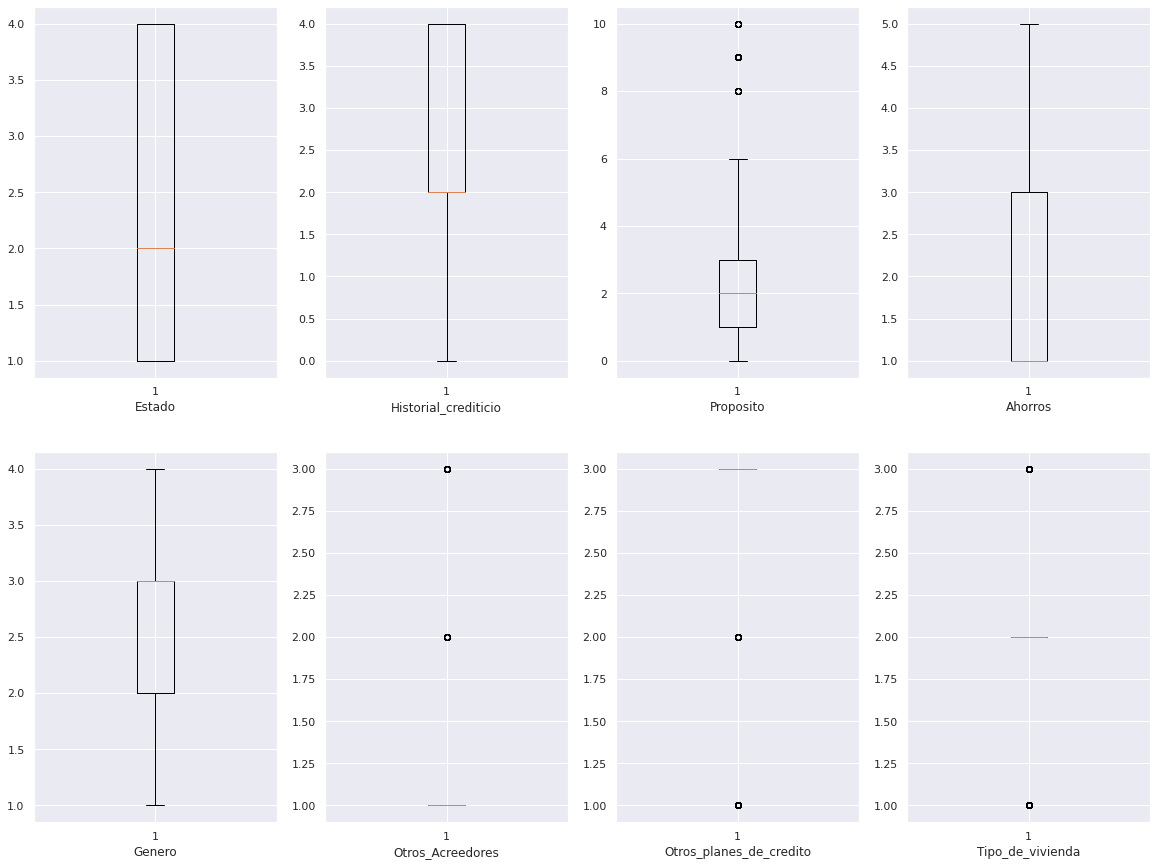

In [25]:
sns.set(rc={'figure.figsize':(20,15)})

figure_1, axes = plt.subplots(2, 4)
for i in range(0,8):
  plt.subplot(2, 4, (i+1))
  plt.boxplot(X_train_categ[X_train_categ.columns[i]])
  plt.xlabel(X_train_categ.columns[i])
plt.show() #Generamos un gráfico de cajas de las variables categóricas para poder visualizar su composición estadística.

 2. **VARIABLES NUMÉRICAS**

In [26]:
X_train_num=X_train[Numerical_Variables].copy() #Copiamos en el conjunto de entrenamiento "X_train_num" las variables numéricas.
X_train_num.describe() #Mostramos un insight estadístico del conjunto creado.


,Duracion,Importe,Edad
count,850.000000,850.000000,850.000000
mean,20.738824,3276.667059,35.208235
std,11.955651,2826.845733,11.173972
min,4.000000,276.000000,19.000000
25%,12.000000,1367.250000,27.000000
50%,18.000000,2328.000000,33.000000
75%,24.000000,3959.000000,41.000000
max,72.000000,18424.000000,75.000000


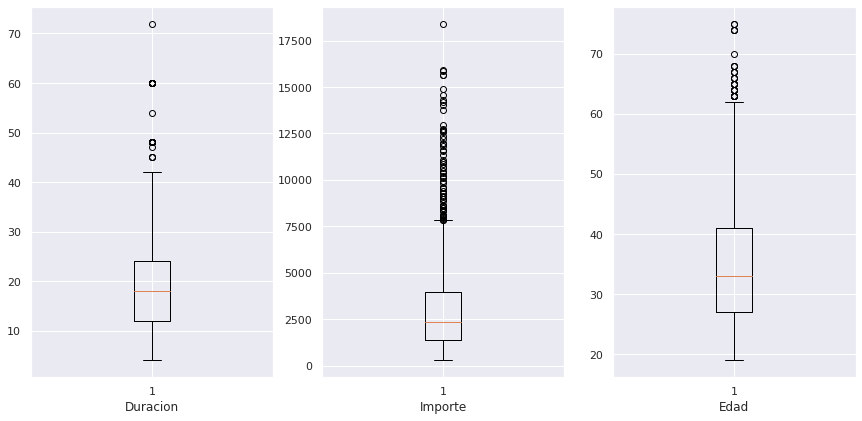

In [27]:
sns.set(rc={'figure.figsize':(20,15)})

figure_2, axes = plt.subplots(1, 3)
for i in range(0,3):
  plt.subplot(2, 4, (i+1))
  plt.boxplot(X_train_num[X_train_num.columns[i]])
  plt.xlabel(X_train_num.columns[i])
plt.show() #Generamos un gráfico de cajas de las variables numéricas para poder visualizar su composición estadística.

 3. **VARIABLES BINARIAS**

In [28]:
X_train_bin=X_train[Binary].copy() #Copiamos en el conjunto de entrenamiento "X_train_bin" las variables binarias.
X_train_bin.describe() #Mostramos un insight estadístico del conjunto creado.

,Dependientes,Telefono,Trabajador_extranjero
count,850.000000,850.000000,850.000000
mean,1.854118,1.408235,1.960000
std,0.353196,0.491796,0.196075
min,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000
50%,2.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000


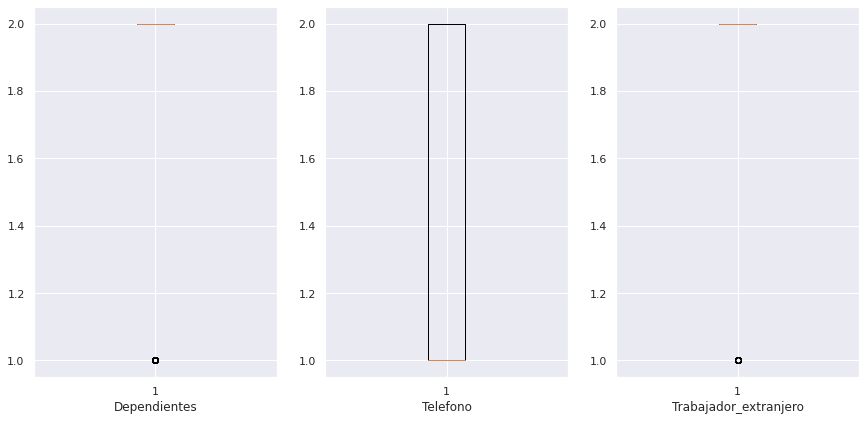

In [29]:
sns.set(rc={'figure.figsize':(20,15)})

figure_3, axes = plt.subplots(1, 3)
for i in range(0,3):
  plt.subplot(2, 4, (i+1))
  plt.boxplot(X_train_bin[X_train_bin.columns[i]])
  plt.xlabel(X_train_bin.columns[i])
plt.show() #Generamos un gráfico de cajas de las variables binarias para poder visualizar su composición estadística.

 4. **VARIABLES ORDINALES**

In [30]:
X_train_ord=X_train[Ordinal].copy() #Copiamos en el conjunto de entrenamiento "X_train_ord" las variables ordinales.
X_train_ord.describe() #Mostramos un insight estadístico del conjunto creado.

,Duracion_Empleo,tasa,Residencia_Actual,Bienes,Numero_de_creditos,trabajo
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,3.363529,2.943529,2.844706,2.337647,1.388235,2.900000
std,1.209829,1.133747,1.097970,1.036493,0.567974,0.658817
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000
50%,3.000000,3.000000,3.000000,2.000000,1.000000,3.000000
75%,4.000000,4.000000,4.000000,3.000000,2.000000,3.000000
max,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000


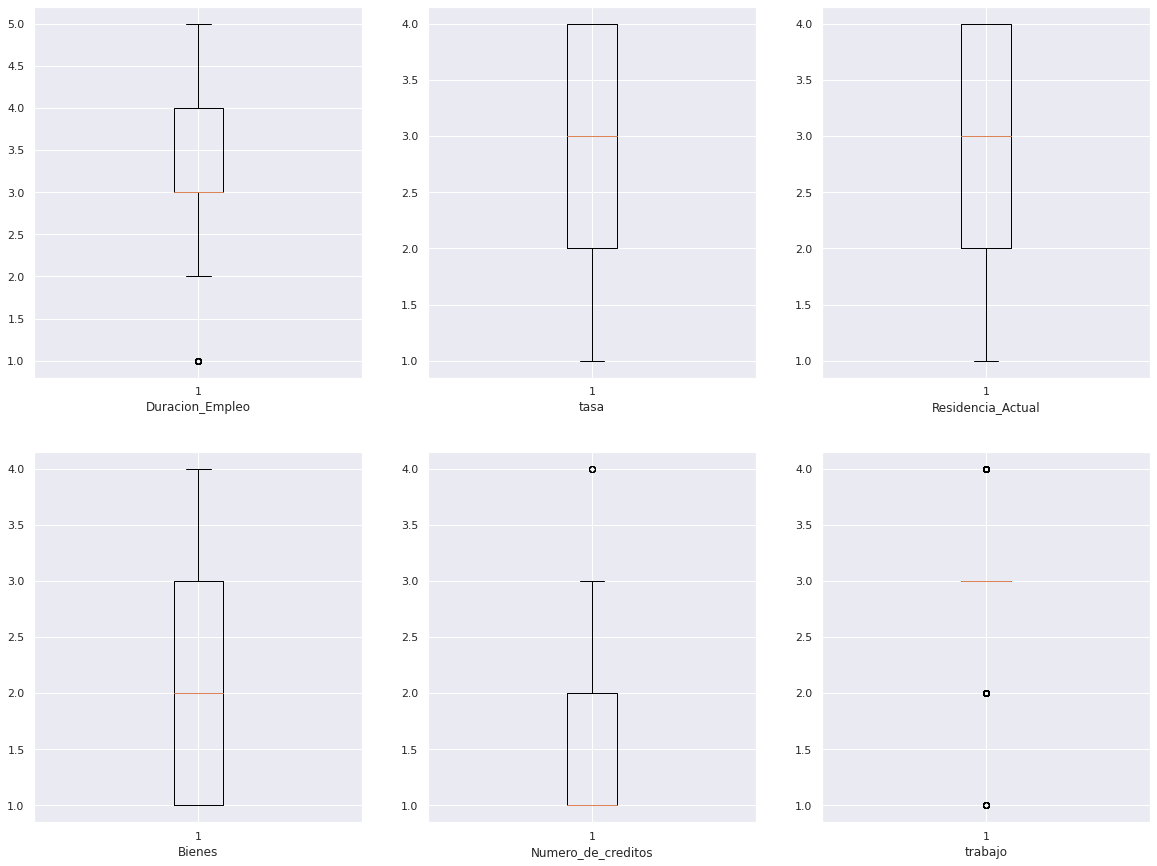

In [31]:
sns.set(rc={'figure.figsize':(20,15)})

figure_3, axes = plt.subplots(2, 3)
for i in range(0,6):
  plt.subplot(2, 3, (i+1))
  plt.boxplot(X_train_ord[X_train_ord.columns[i]])
  plt.xlabel(X_train_ord.columns[i])
plt.show() #Generamos un gráfico de cajas de las variables binarias para poder visualizar su composición estadística.

##IMPUTACION Y TRANSFORMACIÓN

Después de analizar nuestros datos y su distribución, empezaremos con el proceso de imputación y transformación.

**JUSTIFICACIÓN PARA LA IMPUTACIÓN**

A) Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable
(decide y justifica que tipo de imputación realizas en cada caso).

> **Valores numéricos:**
> Decidimos utilizar la imputación mediana y transformación MinMAx por:

In [34]:
#Transformación e imputación para valores Numéricos.
#Decidimos utilizar la imputación mediana y transformación MinMax.
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = Numerical_Variables

> **Valores categóricos:**
> Decidimos utilizar la imputación y Transformación de One Hot Encoding:

In [35]:
#Transformación e imputación para valores Categóricos.
#Decidimos utilizar el modo de imputación y Transformación de One Hot Encoding.
cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first'))])  
cat_pipeline_nombres = Categorical_Variables

> **Valores binarios:**
> Decidimos utilizar la imputación y Transformación de One Hot Encoding:

In [36]:
#Transformación e imputación para valores Binarios.
#Decidimos utilizar el modo de imputación y Transformación de One Hot Encoding.
bin_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first'))])
bin_pipeline_nombres = Binary

> **Valores ordinales:**
> No habrá transformación para este tipo de variables.
> Decidimos utilizar el modo de imputación.

In [37]:

# Imputación para valores ordinales. No habrá transformación para este tipo de variables.
# Decidimos utilizar el modo de imputación  
ord_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])
ord_pipeline_nombres = Ordinal
# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catpipe', cat_pipeline, cat_pipeline_nombres),
                                                        ('binpipe', bin_pipeline, bin_pipeline_nombres),
                                                        ('ordpipe', ord_pipeline, ord_pipeline_nombres)],
                                        remainder='passthrough')

B) Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una
transformación que escale a todas ellas en un rango equiparable.

En el pipeline del numeral A) se incluyó el escalamiento de las variables numéricas:

num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))]) 



C) Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la transformación one-hot encoding. Por el momento dejar las variables ordinales sin transformar.

En el numeral A) se incluyeron ambas transformaciones y se incluye la justificación:

cat_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first'))]) 

bin_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')), ('OneHotE', OneHotEncoder(drop='first'))])


#**Ejercicio-4.**

Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características:

1. Usa los parámetros predeterminados de cada modelo.
2. En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision,recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() de scikit-learn para definir las métricas). 
3. Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.
4. Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como
para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la
métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu
respuesta.
5. En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado:
> 1. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del desempeño de dicha función “learning_curve()”.
> 2. Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.
> 3. Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo. 

En el siguiente bloque definiremos las funciones para el cálculo de las métricas: Accuracy, Precision, Recall, Gmean


In [39]:
def calculate_accuracy(yreal, ypred):
    results = confusion_matrix(yreal, ypred)
    vn, fp, fn, vp = results.ravel()
    acc = (vp + vn)/ (vp+vn+fp+fn)
    return acc

def calculate_precision(yreal, ypred):
    results = confusion_matrix(yreal, ypred)
    vn, fp, fn, vp = results.ravel()
    prec = (vp)/ (vp+fp)
    return prec

def calculate_recall(yreal, ypred):
    results = confusion_matrix(yreal, ypred)
    vn, fp, fn, vp = results.ravel()
    recall = vp/(vp + fn)
    return recall

def calculate_f1score(yreal, ypred):
    results = confusion_matrix(yreal, ypred)
    vn, fp, fn, vp = results.ravel()
    f1score = (2*vp)/(2*vp+ fp + fn)
    return f1score

def calculate_gmean(yreal, ypred):
    results = confusion_matrix(yreal, ypred)
    vn, fp, fn, vp = results.ravel()
    specificity = vn/(vn + fp)
    recall = vp/(vp + fn)
    gmean = np.sqrt(recall * specificity)
    return gmean

In [40]:
models = [LogisticRegression(max_iter=3000), DecisionTreeClassifier(), RandomForestClassifier()]
model_names = ["Logistic_Regression", "Decision_Tree", "Random_Forest"] 
results= list()

for i in range(len(models)):
        #
        pipeline = Pipeline(steps = [('ct', columnasTransformer), (model_names[i], models[i])])
        #
        metrics= {'accuracy':make_scorer(calculate_accuracy), 'precision':make_scorer(calculate_precision), 'recall':make_scorer(calculate_recall), 'f1score':make_scorer(calculate_f1score),'gmean':make_scorer(calculate_gmean) }
        kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
        scores = cross_validate( estimator=pipeline, X=X_train, y=np.ravel(y_train),
            scoring=metrics, cv=kfold, return_train_score=True)
        #El score de cada iteración es almacenado en la lista "scores"
        results.append(scores)
        #Imprimos el resultado para cada modelo
        print('TRAIN METRIC SCORES\n'+'%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean f1_Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (model_names[i],
                                                                          np.mean(scores['train_accuracy']),
                                                                          np.std(scores['train_accuracy']),
                                                                          np.mean(scores['train_precision']), 
                                                                          np.std(scores['train_precision']),
                                                                          np.mean(scores['train_recall']),
                                                                          np.std(scores['train_recall']),
                                                                          np.mean(scores['train_f1score']),
                                                                          np.std(scores['train_f1score']),
                                                                          np.mean(scores['train_gmean']),
                                                                          np.std(scores['train_gmean']),  
                                                                          ))



        print('VALIDATION METRIC SCORES\n'+'%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean f1_Score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (model_names[i],
                                                                          np.mean(scores['test_accuracy']),
                                                                          np.std(scores['test_accuracy']),
                                                                          np.mean(scores['test_precision']), 
                                                                          np.std(scores['test_precision']),
                                                                          np.mean(scores['test_recall']),
                                                                          np.std(scores['test_recall']),
                                                                          np.mean(scores['test_f1score']),
                                                                          np.std(scores['test_f1score']),
                                                                          np.mean(scores['test_gmean']),
                                                                          np.std(scores['test_gmean']),  
                                                                          ))


TRAIN METRIC SCORES
Logistic_Regression:
mean Accuracy: 0.788 (0.0078)
mean Precision: 0.816 (0.0072)
mean Recall: 0.902 (0.0075)
mean f1_Score: 0.857 (0.0051)
Gmean: 0.682 (0.0153)

VALIDATION METRIC SCORES
Logistic_Regression:
mean Accuracy: 0.749 (0.0307)
mean Precision: 0.792 (0.0241)
mean Recall: 0.872 (0.0254)
mean f1_Score: 0.830 (0.0201)
Gmean: 0.629 (0.0565)

TRAIN METRIC SCORES
Decision_Tree:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean f1_Score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

VALIDATION METRIC SCORES
Decision_Tree:
mean Accuracy: 0.680 (0.0297)
mean Precision: 0.774 (0.0235)
mean Recall: 0.771 (0.0470)
mean f1_Score: 0.772 (0.0252)
Gmean: 0.595 (0.0442)

TRAIN METRIC SCORES
Random_Forest:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean f1_Score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

VALIDATION METRIC SCORES
Random_Forest:
mean Accuracy: 0.749 (0.0284)
mean Precision: 0.773 (

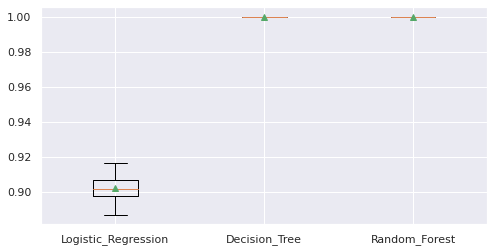

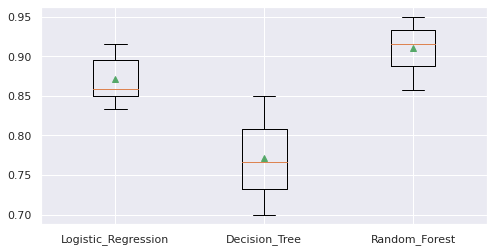

In [41]:
sns.set(rc={'figure.figsize':(8,4)})
bprecall_train = list()
for i in range(len(results)):
  rr = results[i]['train_recall']
  bprecall_train.append(rr)

plt.boxplot(bprecall_train, labels=model_names, showmeans=True)
plt.show()


bprecall_test = list()
for i in range(len(results)):
  rr = results[i]['test_recall']
  bprecall_test.append(rr)

plt.boxplot(bprecall_test, labels=model_names, showmeans=True)
plt.show()

###**QUESTION**

1. Are the models overtrained or undertrained? Justify



Curvas de aprendizaje

In [42]:
def my_LearningCurvePlot(train_sizes, train_scores, val_scores, y_axis_metric):

        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
        plt.figure(figsize=(7,6))
        plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
        plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
        
        plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
        plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
        
        plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
        plt.xlabel('Tamaño del conjunto de entrenamiento')
        plt.ylabel(y_axis_metric)
        plt.grid(b=True)
        plt.legend(loc='lower left')
        plt.show()

In [43]:
def my_ModelnLearningCurve(Xin, models, model_names, y_axis_metric):
  Xc_train=columnasTransformer.fit(Xin)
  Xx_train=Xc_train.transform(Xin)

  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  delta_train_sz = np.linspace(0.1, 1, num=40)

  tr_sizes, tr_scores, val_scores = learning_curve(estimator = models,    
                                                        X = Xx_train,
                                                        y = y_train.values.ravel(),
                                                        cv = kfold,
                                                        train_sizes =delta_train_sz,
                                                        random_state=11, scoring=metrics[y_axis_metric])
  print('Curvas de aprendizaje del ' + model_names)
  my_LearningCurvePlot(tr_sizes, tr_scores, val_scores, y_axis_metric)

In [44]:
def my_ModelnValidationCurve(Xin, models, model_names, y_axis_metric):
  Xc_train=columnasTransformer.fit(Xin)
  Xx_train=Xc_train.transform(Xin)

  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  delta_train_sz = np.linspace(0.1, 1, num=40)

  tr_sizes, tr_scores, val_scores = learning_curve(estimator = models,    
                                                        X = Xx_train,
                                                        y = y_train.values.ravel(),
                                                        cv = kfold,
                                                        train_sizes =delta_train_sz,
                                                        random_state=11, scoring=metrics[y_axis_metric])
  print('Curvas de aprendizaje del ' + model_names)
  my_LearningCurvePlot(tr_sizes, tr_scores, val_scores, y_axis_metric)

Curvas de aprendizaje del Logistic_Regression


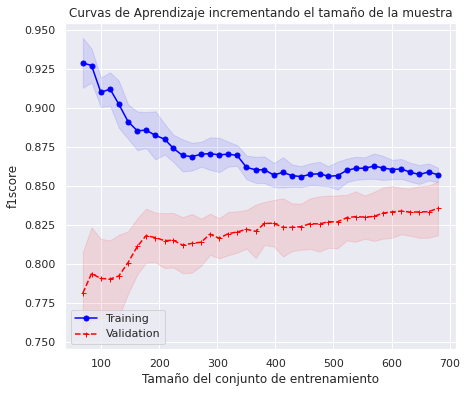

In [45]:
my_ModelnLearningCurve(X_train, models[0], model_names[0], y_axis_metric='f1score')

In [46]:
def my_ModelnValidationCurve(Xin, models, model_names, y_axis_metric):
  Xc_train=columnasTransformer.fit(Xin)
  Xx_train=Xc_train.transform(Xin)

  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  delta_train_sz = np.linspace(1, 20, num=20, dtype='int')



  train_scores, valid_scores = validation_curve(models, 
                                                Xx_train, 
                                                np.ravel(y_train), 
                                                param_name="max_depth", 
                                                param_range=delta_train_sz,
                                                cv=kfold,
                                                scoring=metrics[y_axis_metric])

  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  valid_mean = np.mean(valid_scores, axis=1)
  valid_std = np.std(valid_scores, axis=1)

  print('Curvas de aprendizaje del ' + model_names)
  # Curva de entrenamiento con la métrica de exactitud (accuracy):
  plt.plot(np.linspace(1, 20, num=20, dtype='int'), train_mean, color='blue', marker='o', markersize=5, label='Training')

  # Curva de validación:
  plt.plot(np.linspace(1, 20, num=20, dtype='int'), valid_mean, color='red', marker='o', markersize=5, label='Validation')

  plt.title('Función validation_curve()')
  plt.xlabel('Tamaño del conjunto de entrenamiento')
  plt.ylabel(y_axis_metric)
  plt.grid(b=True)
  plt.legend(loc='lower right')
  plt.show()

Curvas de aprendizaje del Decision_Tree


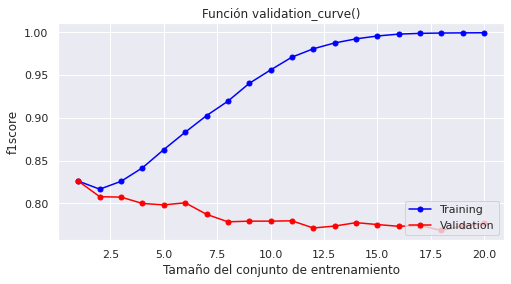

In [47]:
my_ModelnValidationCurve(X_train, models[1], model_names[1], y_axis_metric='f1score')

Curvas de aprendizaje del Random_Forest


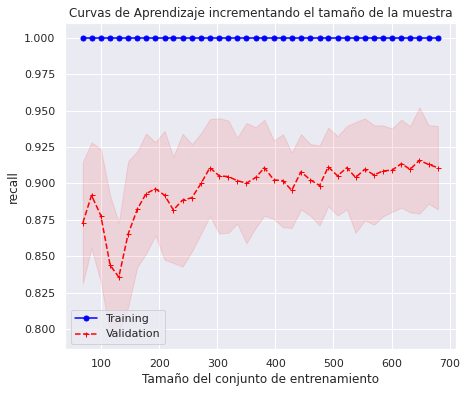

In [48]:
my_ModelnLearningCurve(X_train, models[2], model_names[2], y_axis_metric='recall')

#**Ejercicio-5.**

Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación
cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas.
1. Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de
parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones.
> **NOTA:** Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación.
2. Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score” para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y
evitar el sobreentrenamiento o el subentrenamiento.
3. Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor
del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de la métrica “precision”? Incluye tus conclusiones.
4. Con los mejores valores de los hiperparámetros encontrados con la métrica “precision” para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve), incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y
evitar el sobreentrenamiento o el subentrenamiento.
5. Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”.
Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica “recall”? Incluye tus conclusiones.
> **NOTA:** Toma en cuenta que el método de random forest pude tardar varios minutos en llevar a cabo.
6. Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve), incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.

In [49]:
evaluating_model = LogisticRegression(max_iter=5000)

dicc_grid = {'C':[0.0001,0.01,0.1,1.0,10.,100.], 'class_weight':['balanced', None],
             'solver':['liblinear','saga'], 
             'penalty': ['l2','l1']}  #liblinear was removed because it doesn't work with the same penalty as the others

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

grid_LR = GridSearchCV(estimator=evaluating_model, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring=metrics['f1score'])

In [50]:
# Transformamos los datos de entrada:
Xc_train=columnasTransformer.fit(X_train)
Xx_train=Xc_train.transform(X_train)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6)(5)=30 
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruzada,
# lo cual implica también un mayor tiempo de entrenamiento.

grid_LR.fit(Xx_train, np.ravel(y_train))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid_LR.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid_LR.best_params_)
print('Métrica utilizada:', grid_LR.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.8350047781400751
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1.0, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Métrica utilizada: make_scorer(calculate_f1score)


Curvas de aprendizaje del LogisticRegression


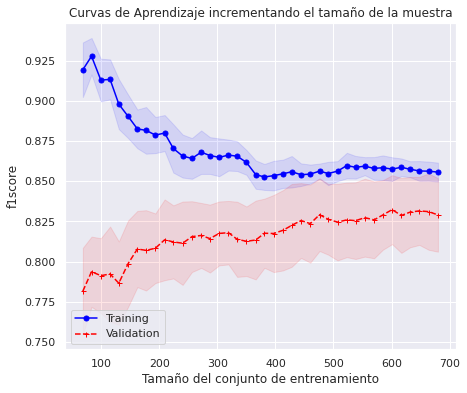

In [51]:
my_ModelnLearningCurve(X_train, models=LogisticRegression(C=1.0, class_weight=None, penalty= 'l2', solver= 'liblinear'), model_names='LogisticRegression', y_axis_metric='f1score')

In [52]:
evaluating_model = models[1]

dicc_grid = {'ccp_alpha':[0,0.005,0.01,0.015, 0.02], 'criterion':['gini', 'entropy'],
             'max_depth':[5,10,15,20,25], 
             'min_samples_split': [2,4,6,8], 'class_weight':['balanced', None]}  

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

grid_DecisionTree = GridSearchCV(estimator=evaluating_model, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring=metrics['precision'])

In [53]:
grid_DecisionTree.fit(Xx_train, np.ravel(y_train))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid_DecisionTree.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid_DecisionTree.best_params_)
print('Métrica utilizada:', grid_DecisionTree.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.8749430141646166
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.02, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Métrica utilizada: make_scorer(calculate_precision)


Curvas de aprendizaje del DecisionTree


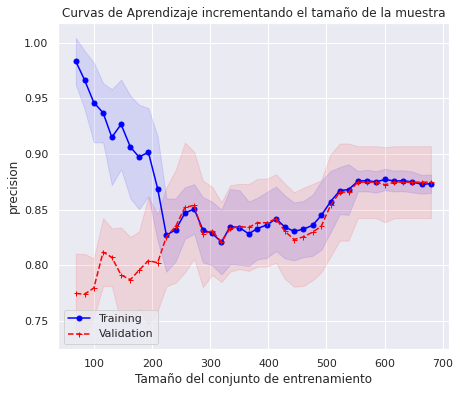

In [54]:
my_ModelnLearningCurve(X_train, models=DecisionTreeClassifier(ccp_alpha= 0.02, class_weight= 'balanced', criterion= 'gini', max_depth= 5, min_samples_split= 2), model_names='DecisionTree', y_axis_metric='precision')

In [55]:
evaluating_model = models[2]

dicc_grid = {'ccp_alpha':[0,0.005,0.01,0.015, 0.02], 'criterion':['gini', 'entropy'],
             'max_depth':[5,10,15,20,25], 
             'min_samples_split': [2,4,6,8], 'class_weight':['balanced', None]}  

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

grid_RandomForest = GridSearchCV(estimator=evaluating_model, 
                    param_grid=dicc_grid, 
                    cv=cv, 
                    scoring=metrics['recall'])

In [56]:
grid_RandomForest.fit(Xx_train, np.ravel(y_train))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid_RandomForest.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid_RandomForest.best_params_)
print('Métrica utilizada:', grid_RandomForest.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.01, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 6}
Métrica utilizada: make_scorer(calculate_recall)


Curvas de aprendizaje del RandomForest


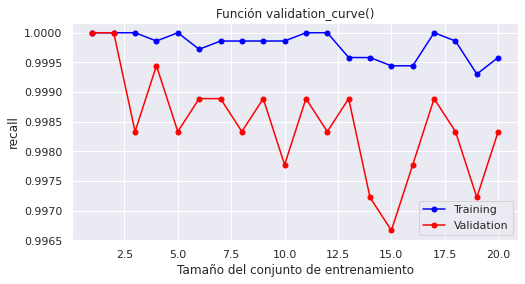

In [57]:
my_ModelnValidationCurve(X_train, models=RandomForestClassifier(ccp_alpha= 0.01, class_weight= None, criterion= 'gini', max_depth= 20, min_samples_split= 4), model_names='RandomForest', y_axis_metric='recall')

#**Ejercicio-6.**
Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo
de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para entrenamiento y validación:
1. Obtener el modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final obtenido.
2. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.
3. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye tus conclusiones finales para este caso.

In [ ]:
None

###**Fin de la Actividad de la semana 6.**